In [32]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color=["#bcbcbc", "#3388b6", "#ff993e", "#8AA9BA", "#D4AF8E"])

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
os.chdir(r"G:\Araki\SMSigxModel\analysis\9_plot_code")
in_path = r"..\8_out\Mahurangi\ws2_ex0.4"
out_path = r"..\10_plot\ws2_ex0.4"
if not os.path.exists(out_path):
   os.makedirs(out_path)

senario_names = ['KGE on Flow', 'KGE on Soil Moisture', 'KGE on seasonal transition', 'KGE on Flow + KGE on Soil Moisture', 'KGE on Flow + Seasonal Timing on Soil Moisture']
senario_short_names = ['Reference', 'None', 'None', 'SM magnitude', 'SM timings']

In [35]:
for i in range(1, 6):
    results_tot_metrics0 = pd.read_csv(os.path.join(in_path, f'senario_{i}', 'post_evaluations.csv'), index_col=0)
    tot_metrics_names = results_tot_metrics0.columns
    results_tot_metrics0['senario_id'] = i
    if i==1:
        results_tot_metrics = results_tot_metrics0
    else:
        results_tot_metrics = pd.concat([results_tot_metrics, results_tot_metrics0])

results_tot_metrics

,KGE on Flow,KGE on Soil Moisture Content,season_transition_dry2wet_s,season_transition_dry2wet_e,season_transition_wet2dry_s,season_transition_wet2dry_e,KGE on Flow_Behavioral,GLUE_results_Behavioral,senario_id,KGE on Soil Moisture Content_Behavioral,season_transition_dry2wet_s_Behavioral,season_transition_dry2wet_e_Behavioral,season_transition_wet2dry_s_Behavioral,season_transition_wet2dry_e_Behavioral
0,0.590231,0.635979,12.270570,28.128731,18.603654,0.345400,True,True,1,NaN,NaN,NaN,NaN,NaN
1,0.565222,0.583639,10.499610,17.108997,15.840759,35.207061,True,True,1,NaN,NaN,NaN,NaN,NaN
2,0.575150,0.550752,8.440500,23.426065,11.333597,30.974459,True,True,1,NaN,NaN,NaN,NaN,NaN
3,0.700024,0.059395,10.066578,4.123011,15.409693,37.978466,True,True,1,NaN,NaN,NaN,NaN,NaN
4,0.876575,0.847321,9.856901,25.451436,19.366933,2.328929,True,True,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.800518,0.720398,6.639237,23.941728,6.188337,26.434384,True,True,5,NaN,True,True,True,True
9983,0.848205,0.689276,7.620107,24.572893,20.839014,6.673190,True,True,5,NaN,True,True,True,True
9990,0.798985,0.650304,6.313472,24.836361,8.338684,26.739617,True,True,5,NaN,True,True,True,True
9998,0.846318,0.720921,4.348540,27.571210,22.562115,12.874940,True,True,5,NaN,True,True,True,True


In [36]:
tot_metrics_names

Index(['KGE on Flow', 'KGE on Soil Moisture Content',
       'season_transition_dry2wet_s', 'season_transition_dry2wet_e',
       'season_transition_wet2dry_s', 'season_transition_wet2dry_e',
       'KGE on Flow_Behavioral', 'season_transition_dry2wet_s_Behavioral',
       'season_transition_dry2wet_e_Behavioral',
       'season_transition_wet2dry_s_Behavioral',
       'season_transition_wet2dry_e_Behavioral', 'GLUE_results_Behavioral'],
      dtype='object')

season_transition_dry2wet_s
season_transition_dry2wet_e
season_transition_wet2dry_s
season_transition_wet2dry_e


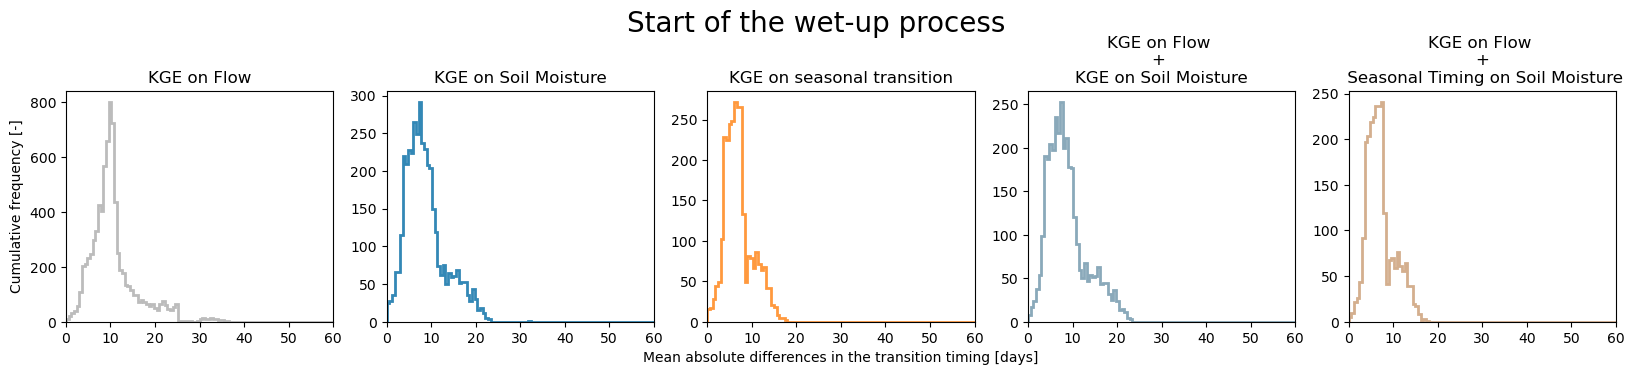

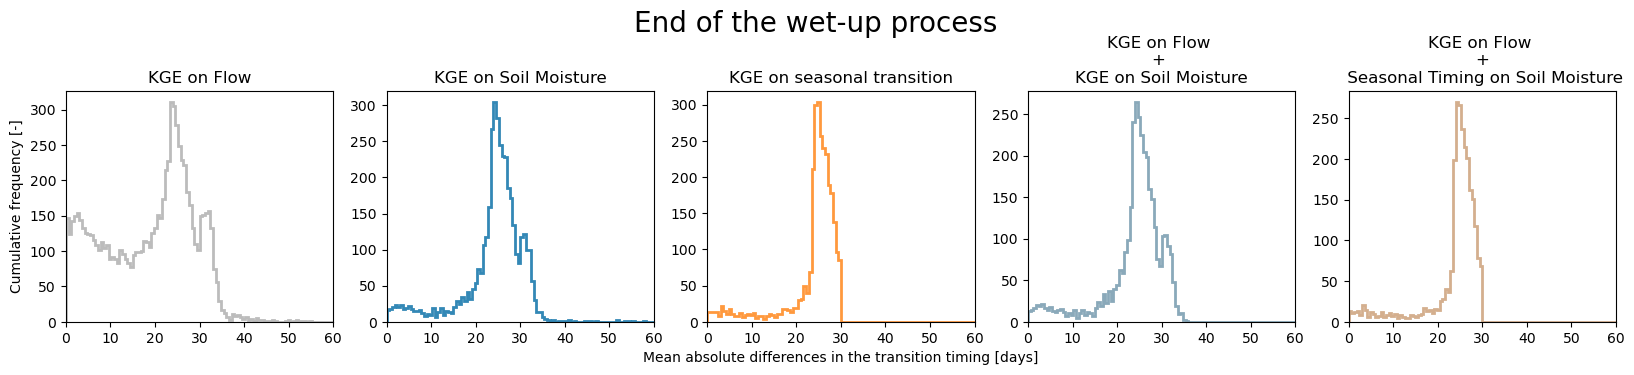

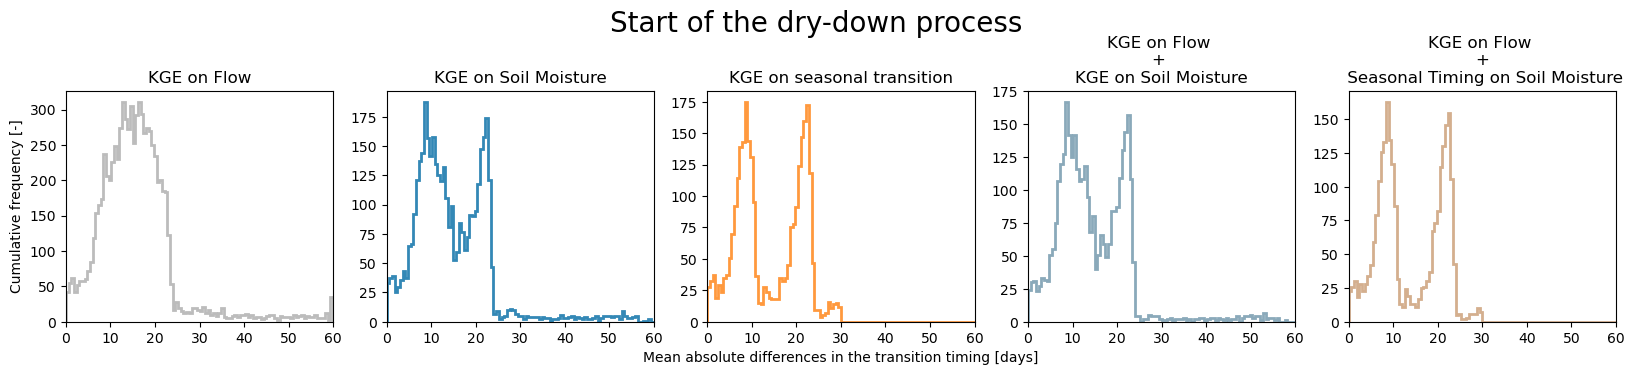

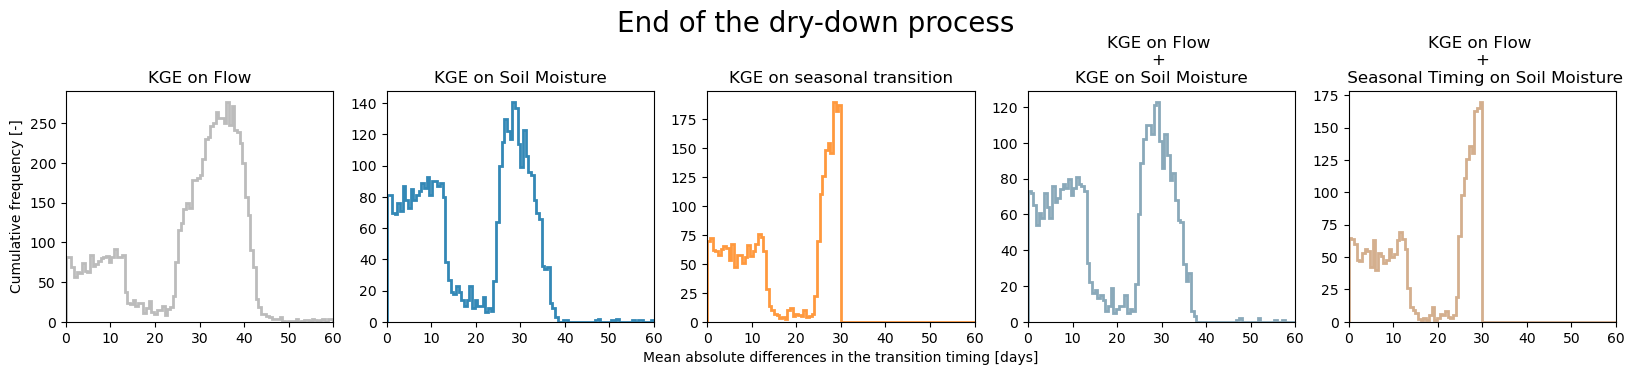

In [62]:
fig_title = ['KGE on Flow', 'KGE on Soil Moisture Content', 'Seasonal transition timing on Soil Moisture \n (End of the dry season)', 'Seasonal transition timing on Soil Moisture \n (Start of the wet season)', 
            'Seasonal transition timing on Soil Moisture \n (End of the wet season)', 'Seasonal transition timing on Soil Moisture \n (Start of the dry season)']
senario_names_for_title = ['KGE on Flow', 'KGE on Soil Moisture', 'KGE on seasonal transition', 'KGE on Flow \n+ \nKGE on Soil Moisture', 'KGE on Flow \n+\n Seasonal Timing on Soil Moisture']
# colors = ['#BCBCBC', '#3388B6', '#3388B6', '#3388B6', '#FF993E']
seasonsig_items = ['season_transition_dry2wet_s','season_transition_dry2wet_e','season_transition_wet2dry_s', 'season_transition_wet2dry_e']
seasonsig_title = ['Start of the wet-up process','End of the wet-up process','Start of the dry-down process', 'End of the dry-down process']
color=["#bcbcbc", "#3388b6", "#ff993e", "#8AA9BA", "#D4AF8E"]

for j in range(len(seasonsig_items)):
    print(seasonsig_items[j])
    fig, ax = plt.subplots(1,5, figsize=(20, 3))
    for i in range(5):
        data = results_tot_metrics[[seasonsig_items[j], 'senario_id']][results_tot_metrics['senario_id']==i+1].copy()
        data_np = data[seasonsig_items[j]].values
        counts, bins = np.histogram(data_np, bins=100, range=(0,60))
        
        #plot CDF
        ax[i].stairs(counts, bins, label=f"Senario {i+1}\n({senario_names[i]})", linewidth=2, color=color[i])
        ax[i].set_xlim([0, 60])
        ax[i].set_title(senario_names_for_title[i])
        if i==2:
            ax[i].set_xlabel('Mean absolute differences in the transition timing [days]')
        if i==0:
            ax[i].set_ylabel('Cumulative frequency [-]')
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle(seasonsig_title[j], x=0.5, y=1.15, fontsize = 20)
    fig.savefig(os.path.join(out_path, f'histogram_{seasonsig_items[j]}.png'))